# Visualización de datos: PRAC 1. Elección del conjunto de datos: 

## Human Resources in Science & Techonology Dataset

Jorge Álvarez Gracia

Fuente de los datos: https://ec.europa.eu/eurostat/web/science-technology-innovation/data/database

Dentro de los dataset disponibles podemos diferenciar por países de la Unión Europea y por regiones como vemos a continuación.
Para estos dos tipos de dataset disponemos de la siguiente información:

              HRST at national level (hrst_st_nat)	
                
						- HRST by category, sex and age (hrst_st_ncat)	
						- Employed HRST by category, age and occupation (hrst_st_nocc)	
						- Employed HRST by category, age and NACE Rev. 2 activity (hrst_st_nsec2)	
						- Employed HRST by category, sex, age and NACE Rev. 2 activity (hrst_st_nsecsex2)	
						- Unemployed persons by HRST category and sex (hrst_st_nunesex)	
						- Unemployed persons by HRST category and age (hrst_st_nuneage)
                        
                        
				HRST at regional level (hrst_st_reg)	
						
                        - HRST by category and NUTS 2 regions (hrst_st_rcat)	
						- HRST by category, sex and NUTS 1 regions (hrst_st_rsex)	
						- HRST by category, age and NUTS 1 regions (hrst_st_rage)	
						- Employed HRST by category, NACE Rev. 2 activity and NUTS 1 regions (hrst_st_rsec2)	

Además tambien encontramos información sobre la movilidad:

                        - Job-to-job mobility of HRST (hrst_fl_mob)
						- Job-to-job mobility of HRST by sex (hrst_fl_mobsex)	
						- Job-to-job mobility of HRST by age (hrst_fl_mobage)	
						- Job-to-job mobility of HRST by NACE Rev. 2 activity (hrst_fl_mobsect2)

Tras elegir la temática, hemos decidido que lo interesante sería utilizar varios datasets de esta base de datos, realizando la comparación entre disitintos generos si tener encuenta la edad ya que consideramos que es menos relevante y para toda la serie temporal disponible desde el añp 2000.

En concreto utilizaremos y personalizaremos los distintos datasets:

- HRST by category, sex and age (hrst_st_ncat)   ---> Denominaremos a este dataframe( HRST_by_category_general)
- Employed HRST by category, sex, age and NACE Rev. 2 activity (hrst_st_nsecsex2) ---> (HRST_category_sex_Employed)   
- Unemployed persons by HRST category and sex (hrst_st_nunesex) ---> (HRST_category_sex_unemployed)

## Carga y limipeza del conjunto de datos elegidos

In [241]:
import pandas as pd

### HRST_by_category_general

### Variables iniciales del conjunto de datos:


    Online data code:	HRST_ST_NCAT
    Source of data:	Eurostat

    Last data update:	27/04/2022  23:00 (5 days ago)
    Last structure update:	27/04/2022

    Overall data coverage:	1994 — 2021
    Number of values:	251 661

**unit**:

    Thousand [THS] 
   
    
**category**:

    Persons with tertiary education (ISCED) and/or employed in science and technology [HRST]
    Persons with tertiary education (ISCED) [HRSTE]
    Persons employed in science and technology [HRSTO]
    Persons with tertiary education (ISCED) and employed in science and technology [HRSTC]
    Scientists and engineers [SE]
    
**Statistical classification of economic activities in the European Community (NACE Rev. 2)[NACE_R2]	multiple
5/15**	

       Total - all NACE activities [TOTAL]
       High-technology sectors (high-technology manufacturing and knowledge-intensive high-technology services) [HTC]
       Manufacturing [C]
       High and medium high-technology manufacturing [C_HTC_MH]
       Manufacture of motor vehicles, trailers and semi-trailers 

**sex**:

    F: Female
    M: Male
    T: Total
    
**Age class**: 

      From 15 to 74 years [Y15-74]
      From 25 to 64 years [Y25-64]
**geo**:

    European Union - 27 countries (from 2020) [EU27_2020]
    European Union - 28 countries (2013-2020) [EU28]
    European Union - 15 countries (1995-2004) [EU15]
    Euro area - 19 countries (from 2015) [EA19]
    Belgium [BE]
    Bulgaria [BG]
    Czechia [CZ]
    Denmark [DK]
    Germany (until 1990 former territory of the FRG) [DE]
    Estonia [EE]
    Romania [RO]
    Slovenia [SI]
    Slovakia [SK]
    Finland [FI]
    Sweden [SE]
    Iceland [IS]
    Norway [NO]
    Switzerland [CH]
    United Kingdom [UK]
    Montenegro [ME]
    North Macedonia [MK]
    Serbia [RS]
    
**TIME_PERIOD**:

    Desde 1994 a 2021
    
**OBS_VALUE**:
 
    Observed value per unit of measure

Meta data element: https://ec.europa.eu/eurostat/cache/metadata/en/hrst_esms.htm

In [242]:
HRST_National_by_category_sex_age = pd.read_csv('data/hrst_st_ncat_linear.csv')

In [243]:
HRST_by_category_general = HRST_National_by_category_sex_age
HRST_by_category_general.head()

,DATAFLOW,LAST UPDATE,freq,unit,category,age,sex,geo,TIME_PERIOD,OBS_VALUE,OBS_FLAG
0,ESTAT:HRST_ST_NCAT(1.0),27/04/22 23:00:00,A,PC_ACT,HRST,Y15-24_Y65-74,F,AT,1995,16.6,NaN
1,ESTAT:HRST_ST_NCAT(1.0),27/04/22 23:00:00,A,PC_ACT,HRST,Y15-24_Y65-74,F,AT,1996,17.4,NaN
2,ESTAT:HRST_ST_NCAT(1.0),27/04/22 23:00:00,A,PC_ACT,HRST,Y15-24_Y65-74,F,AT,1997,17.9,NaN
3,ESTAT:HRST_ST_NCAT(1.0),27/04/22 23:00:00,A,PC_ACT,HRST,Y15-24_Y65-74,F,AT,1998,18.7,b
4,ESTAT:HRST_ST_NCAT(1.0),27/04/22 23:00:00,A,PC_ACT,HRST,Y15-24_Y65-74,F,AT,1999,17.7,NaN


In [244]:
HRST_by_category_final = HRST_by_category_general

In [245]:
# Eliminamos las variables que no nos interesan
HRST_by_category_final = HRST_by_category_final.drop(['DATAFLOW','LAST UPDATE','freq','age','OBS_FLAG'], axis = 1)
# Cogemos solo los valores a partir del año 2000
HRST_by_category_final = HRST_by_category_final[HRST_by_category_final['TIME_PERIOD']>1999]
print('----------------HRST_by_category_final----------------')
display(HRST_by_category_final.head(5))
print(len(HRST_by_category_final))

----------------HRST_by_category_final----------------


,unit,category,sex,geo,TIME_PERIOD,OBS_VALUE
5,PC_ACT,HRST,F,AT,2000,18.4
6,PC_ACT,HRST,F,AT,2001,19.9
7,PC_ACT,HRST,F,AT,2002,18.5
8,PC_ACT,HRST,F,AT,2003,18.7
9,PC_ACT,HRST,F,AT,2004,28.1


218091


### Variables finales del conjunto de datos:

**unit**:

    Thousand [THS] 
    Percentage of total employment [PC_EMP]
    
**category**:
  
    Persons with tertiary education (ISCED) and/or employed in science and technology [HRST]
    Persons with tertiary education (ISCED) [HRSTE]
    Persons employed in science and technology [HRSTO]
    Persons with tertiary education (ISCED) and employed in science and technology [HRSTC]
    Scientists and engineers [SE]
    

**sex** :

    F: Female
    M: Male
    T: Total
    
**geo**:

    European Union - 27 countries (from 2020) [EU27_2020]
    European Union - 28 countries (2013-2020) [EU28]
    European Union - 15 countries (1995-2004) [EU15]
    Euro area - 19 countries (from 2015) [EA19]
    Belgium [BE]
    Bulgaria [BG]
    Czechia [CZ]
    Denmark [DK]
    Germany (until 1990 former territory of the FRG) [DE]
    Estonia [EE]
    Romania [RO]
    Slovenia [SI]
    Slovakia [SK]
    Finland [FI]
    Sweden [SE]
    Iceland [IS]
    Norway [NO]
    Switzerland [CH]
    United Kingdom [UK]
    Montenegro [ME]
    North Macedonia [MK]
    Serbia [RS]
    
**TIME_PERIOD**:

    Desde 2000 a 2021
    
**OBS_VALUE**:
 
    Observed value per unit of measure

### HRST_category_sex_employed

### Variables iniciales del conjunto de datos:


    Online data code:	HRST_ST_NSECSEX2
    Source of data:	Eurostat

    Last data update:	27/04/2022  23:00 (5 days ago)
    Last structure update:	27/04/2022

    Overall data coverage:	2008 — 2021
    Number of values:	450 070

**unit**:

    Thousand [THS] 
    Percentage of total employment [PC_EMP]
    
**category**:

    Persons with tertiary education (ISCED) and/or employed in science and technology [HRST]
    Persons with tertiary education (ISCED) [HRSTE]
    Persons employed in science and technology [HRSTO]
    Persons with tertiary education (ISCED) and employed in science and technology [HRSTC]
    Scientists and engineers [SE]
    
**Statistical classification of economic activities in the European Community (NACE Rev. 2)[NACE_R2]	multiple
5/15**	

       Total - all NACE activities [TOTAL]
       High-technology sectors (high-technology manufacturing and knowledge-intensive high-technology services) [HTC]
       Manufacturing [C]
       High and medium high-technology manufacturing [C_HTC_MH]
       Manufacture of motor vehicles, trailers and semi-trailers 

**sex **:

    F: Female
    M: Male
    T: Total
    
**Age class**: 

      From 15 to 74 years [Y15-74]
      From 25 to 64 years [Y25-64]
**geo**:

    European Union - 27 countries (from 2020) [EU27_2020]
    European Union - 28 countries (2013-2020) [EU28]
    European Union - 15 countries (1995-2004) [EU15]
    Euro area - 19 countries (from 2015) [EA19]
    Belgium [BE]
    Bulgaria [BG]
    Czechia [CZ]
    Denmark [DK]
    Germany (until 1990 former territory of the FRG) [DE]
    Estonia [EE]
    Romania [RO]
    Slovenia [SI]
    Slovakia [SK]
    Finland [FI]
    Sweden [SE]
    Iceland [IS]
    Norway [NO]
    Switzerland [CH]
    United Kingdom [UK]
    Montenegro [ME]
    North Macedonia [MK]
    Serbia [RS]
    
**TIME_PERIOD**:

    Desde 2008 a 2021
    
**OBS_VALUE**:
 
    Observed value per unit of measure

In [246]:
HRST_category_sex_employed = pd.read_csv('data/hrst_st_nsecsex_linear.csv')
display(HRST_category_sex_employed.head(4))

,DATAFLOW,LAST UPDATE,freq,sex,category,nace_r2,age,unit,geo,TIME_PERIOD,OBS_VALUE,OBS_FLAG
0,ESTAT:HRST_ST_NSECSEX2(1.0),27/04/22 23:00:00,A,F,HRST,C,Y15-74,PC_EMP,AT,2008,6.6,b
1,ESTAT:HRST_ST_NSECSEX2(1.0),27/04/22 23:00:00,A,F,HRST,C,Y15-74,PC_EMP,AT,2009,5.8,NaN
2,ESTAT:HRST_ST_NSECSEX2(1.0),27/04/22 23:00:00,A,F,HRST,C,Y15-74,PC_EMP,AT,2010,6.1,NaN
3,ESTAT:HRST_ST_NSECSEX2(1.0),27/04/22 23:00:00,A,F,HRST,C,Y15-74,PC_EMP,AT,2011,5.6,b


In [247]:
HRST_employed_final = HRST_category_sex_employed

In [248]:
# Eliminamos las variables que no nos interesan
HRST_employed_final = HRST_employed_final.drop(['DATAFLOW','LAST UPDATE','freq','nace_r2','age','OBS_FLAG'], axis = 1)
print('----------------HRST_employed_final----------------')
display(HRST_employed_final.head(5))
print(len(HRST_employed_final))

----------------HRST_employed_final----------------


,sex,category,unit,geo,TIME_PERIOD,OBS_VALUE
0,F,HRST,PC_EMP,AT,2008,6.6
1,F,HRST,PC_EMP,AT,2009,5.8
2,F,HRST,PC_EMP,AT,2010,6.1
3,F,HRST,PC_EMP,AT,2011,5.6
4,F,HRST,PC_EMP,AT,2012,6.0


450070


### Variables finales del conjunto de datos:

**unit**:

    Thousand [THS] 
    Percentage of total employment [PC_EMP]
    
**category**:

    Persons with tertiary education (ISCED) and/or employed in science and technology [HRST]
    Persons with tertiary education (ISCED) [HRSTE]
    Persons employed in science and technology [HRSTO]
    Persons with tertiary education (ISCED) and employed in science and technology [HRSTC]
    Scientists and engineers [SE]
    

**sex** :

    F: Female
    M: Male
    T: Total
**geo**:

    European Union - 27 countries (from 2020) [EU27_2020]
    European Union - 28 countries (2013-2020) [EU28]
    European Union - 15 countries (1995-2004) [EU15]
    Euro area - 19 countries (from 2015) [EA19]
    Belgium [BE]
    Bulgaria [BG]
    Czechia [CZ]
    Denmark [DK]
    Germany (until 1990 former territory of the FRG) [DE]
    Estonia [EE]
    Romania [RO]
    Slovenia [SI]
    Slovakia [SK]
    Finland [FI]
    Sweden [SE]
    Iceland [IS]
    Norway [NO]
    Switzerland [CH]
    United Kingdom [UK]
    Montenegro [ME]
    North Macedonia [MK]
    Serbia [RS]
    
**TIME_PERIOD**:

    Desde 2008 a 2021
    
**OBS_VALUE**:
 
    Observed value per unit of measure

### HRST_category_sex_unemployed 

#### Variables iniciales del conjunto de datos:

    Online data code:	HRST_ST_NUNESEX
    Source of data:	Eurostat

    Last data update:	27/04/2022  23:00 (5 days ago)
    Last structure update:	27/04/2022

    Overall data coverage:	1994 — 2021
    Number of values:	11 144

**unit**:

    Thousand [THS]
    Unemployment rate [RT_UNE]
    
**category**:

    Unemployed persons with tertiary education (ISCED) [HRSTU]
    Unemployed persons with non-tertiary education (ISCED) [NON_HRSTU]
**sex** :

    F: Female
    M: Male
    T: Total
**geo**:

    European Union - 27 countries (from 2020) [EU27_2020]
    European Union - 28 countries (2013-2020) [EU28]
    European Union - 15 countries (1995-2004) [EU15]
    Euro area - 19 countries (from 2015) [EA19]
    Belgium [BE]
    Bulgaria [BG]
    Czechia [CZ]
    Denmark [DK]
    Germany (until 1990 former territory of the FRG) [DE]
    Estonia [EE]
    Romania [RO]
    Slovenia [SI]
    Slovakia [SK]
    Finland [FI]
    Sweden [SE]
    Iceland [IS]
    Norway [NO]
    Switzerland [CH]
    United Kingdom [UK]
    Montenegro [ME]
    North Macedonia [MK]
    Serbia [RS]

**TIME_PERIOD**:

    Desde 1994 a 2021

**OBS_VALUE**:
 
    Observed value per unit of measure

In [249]:
HRST_category_sex_unemployed = pd.read_csv('data/hrst_st_nunesex_linear.csv')
display(HRST_category_sex_unemployed.head(2))

,DATAFLOW,LAST UPDATE,freq,unit,category,sex,geo,TIME_PERIOD,OBS_VALUE,OBS_FLAG
0,ESTAT:HRST_ST_NUNESEX(1.0),27/04/22 23:00:00,A,RT_UNE,HRSTU,F,AT,1995,NaN,u
1,ESTAT:HRST_ST_NUNESEX(1.0),27/04/22 23:00:00,A,RT_UNE,HRSTU,F,AT,1996,NaN,u


In [250]:
HRST_unemployed_final = HRST_category_sex_unemployed

In [251]:
# Eliminamos las variables que no nos interesan
HRST_unemployed_final = HRST_unemployed_final.drop(['DATAFLOW','LAST UPDATE','freq','OBS_FLAG'], axis = 1)
# Cogemos solo los valores a partir del año 2000
HRST_unemployed_final = HRST_unemployed_final[HRST_unemployed_final['TIME_PERIOD']>1999]
print('----------------HRST_unemployed_final----------------')
display(HRST_unemployed_final.tail(10))
print(len(HRST_unemployed_final))

----------------HRST_unemployed_final----------------


,unit,category,sex,geo,TIME_PERIOD,OBS_VALUE
11134,THS,NON_HRSTU,T,UK,2010,1976.6
11135,THS,NON_HRSTU,T,UK,2011,2021.4
11136,THS,NON_HRSTU,T,UK,2012,1973.5
11137,THS,NON_HRSTU,T,UK,2013,1899.8
11138,THS,NON_HRSTU,T,UK,2014,1548.0
11139,THS,NON_HRSTU,T,UK,2015,1317.3
11140,THS,NON_HRSTU,T,UK,2016,1183.5
11141,THS,NON_HRSTU,T,UK,2017,1049.7
11142,THS,NON_HRSTU,T,UK,2018,978.2
11143,THS,NON_HRSTU,T,UK,2019,887.0


9716


#### Las variables resultantes de este conjunto de datos son:


**unit**:

        Thousand [THS] 
        Unemployment rate [RT_UNE] 
        
**category**:

        Unemployed persons with tertiary education (ISCED) [HRSTU]
        Unemployed persons with non-tertiary education (ISCED) [NON_HRSTU]

**sex**:

    F: Female
    M: Male
    T: Total

**geo**:

    European Union - 27 countries (from 2020) [EU27_2020]
    European Union - 28 countries (2013-2020) [EU28]
    European Union - 15 countries (1995-2004) [EU15]
    Euro area - 19 countries (from 2015) [EA19]
    Belgium [BE]
    Bulgaria [BG]
    Czechia [CZ]
    Denmark [DK]
    Germany (until 1990 former territory of the FRG) [DE]
    Estonia [EE]
    Romania [RO]
    Slovenia [SI]
    Slovakia [SK]
    Finland [FI]
    Sweden [SE]
    Iceland [IS]
    Norway [NO]
    Switzerland [CH]
    United Kingdom [UK]
    Montenegro [ME]
    North Macedonia [MK]
    Serbia [RS]

**TIME_PERIOD**:

    Desde 2020 a 2021
    
 **OBS_VALUE**:
 
    Observed value per unit of measure

###  Unimos todos los dataframe

In [252]:
Hrst_final = pd.concat([HRST_by_category_final, HRST_employed_final,HRST_unemployed_final], axis=0)
display(Hrst_final)

,unit,category,sex,geo,TIME_PERIOD,OBS_VALUE
5,PC_ACT,HRST,F,AT,2000,18.4
6,PC_ACT,HRST,F,AT,2001,19.9
7,PC_ACT,HRST,F,AT,2002,18.5
8,PC_ACT,HRST,F,AT,2003,18.7
9,PC_ACT,HRST,F,AT,2004,28.1
...,...,...,...,...,...,...
11139,THS,NON_HRSTU,T,UK,2015,1317.3
11140,THS,NON_HRSTU,T,UK,2016,1183.5
11141,THS,NON_HRSTU,T,UK,2017,1049.7
11142,THS,NON_HRSTU,T,UK,2018,978.2


In [253]:
variables_categoricas = ['unit', 'category','sex','geo']
for variables_categorica in variables_categoricas:
    categorias = set(Hrst_final[variables_categorica])
    print('Para {} tenemos las siguientes categorías: {}'.format(variables_categorica, categorias))

Para unit tenemos las siguientes categorías: {'RT_UNE', 'PC_EMP', 'PC_POP', 'THS', 'PC_ACT'}
Para category tenemos las siguientes categorías: {'HRSTE', 'NON_HRSTU', 'HRSTO', 'HRSTC', 'SE', 'HRST', 'HRSTU'}
Para sex tenemos las siguientes categorías: {'T', 'M', 'F'}
Para geo tenemos las siguientes categorías: {'HR', 'LT', 'CZ', 'EU15', 'ES', 'MT', 'IT', 'CH', 'IS', 'BG', 'HU', 'LV', 'TR', 'RO', 'SE', 'PT', 'NL', 'MK', 'IE', 'BE', 'PL', 'DK', 'CY', 'FI', 'ME', 'NO', 'SK', 'EE', 'LU', 'SI', 'UK', 'EU28', 'AT', 'FR', 'DE', 'RS', 'EL', 'EU27_2020', 'EA19'}


In [254]:
#Sns plots configuration
sns.set_theme(style="whitegrid", palette="pastel")
sns.set_context("notebook", font_scale=3, rc={"lines.linewidth": 1.9,"axes.spines.right": False, "axes.spines.top": False})

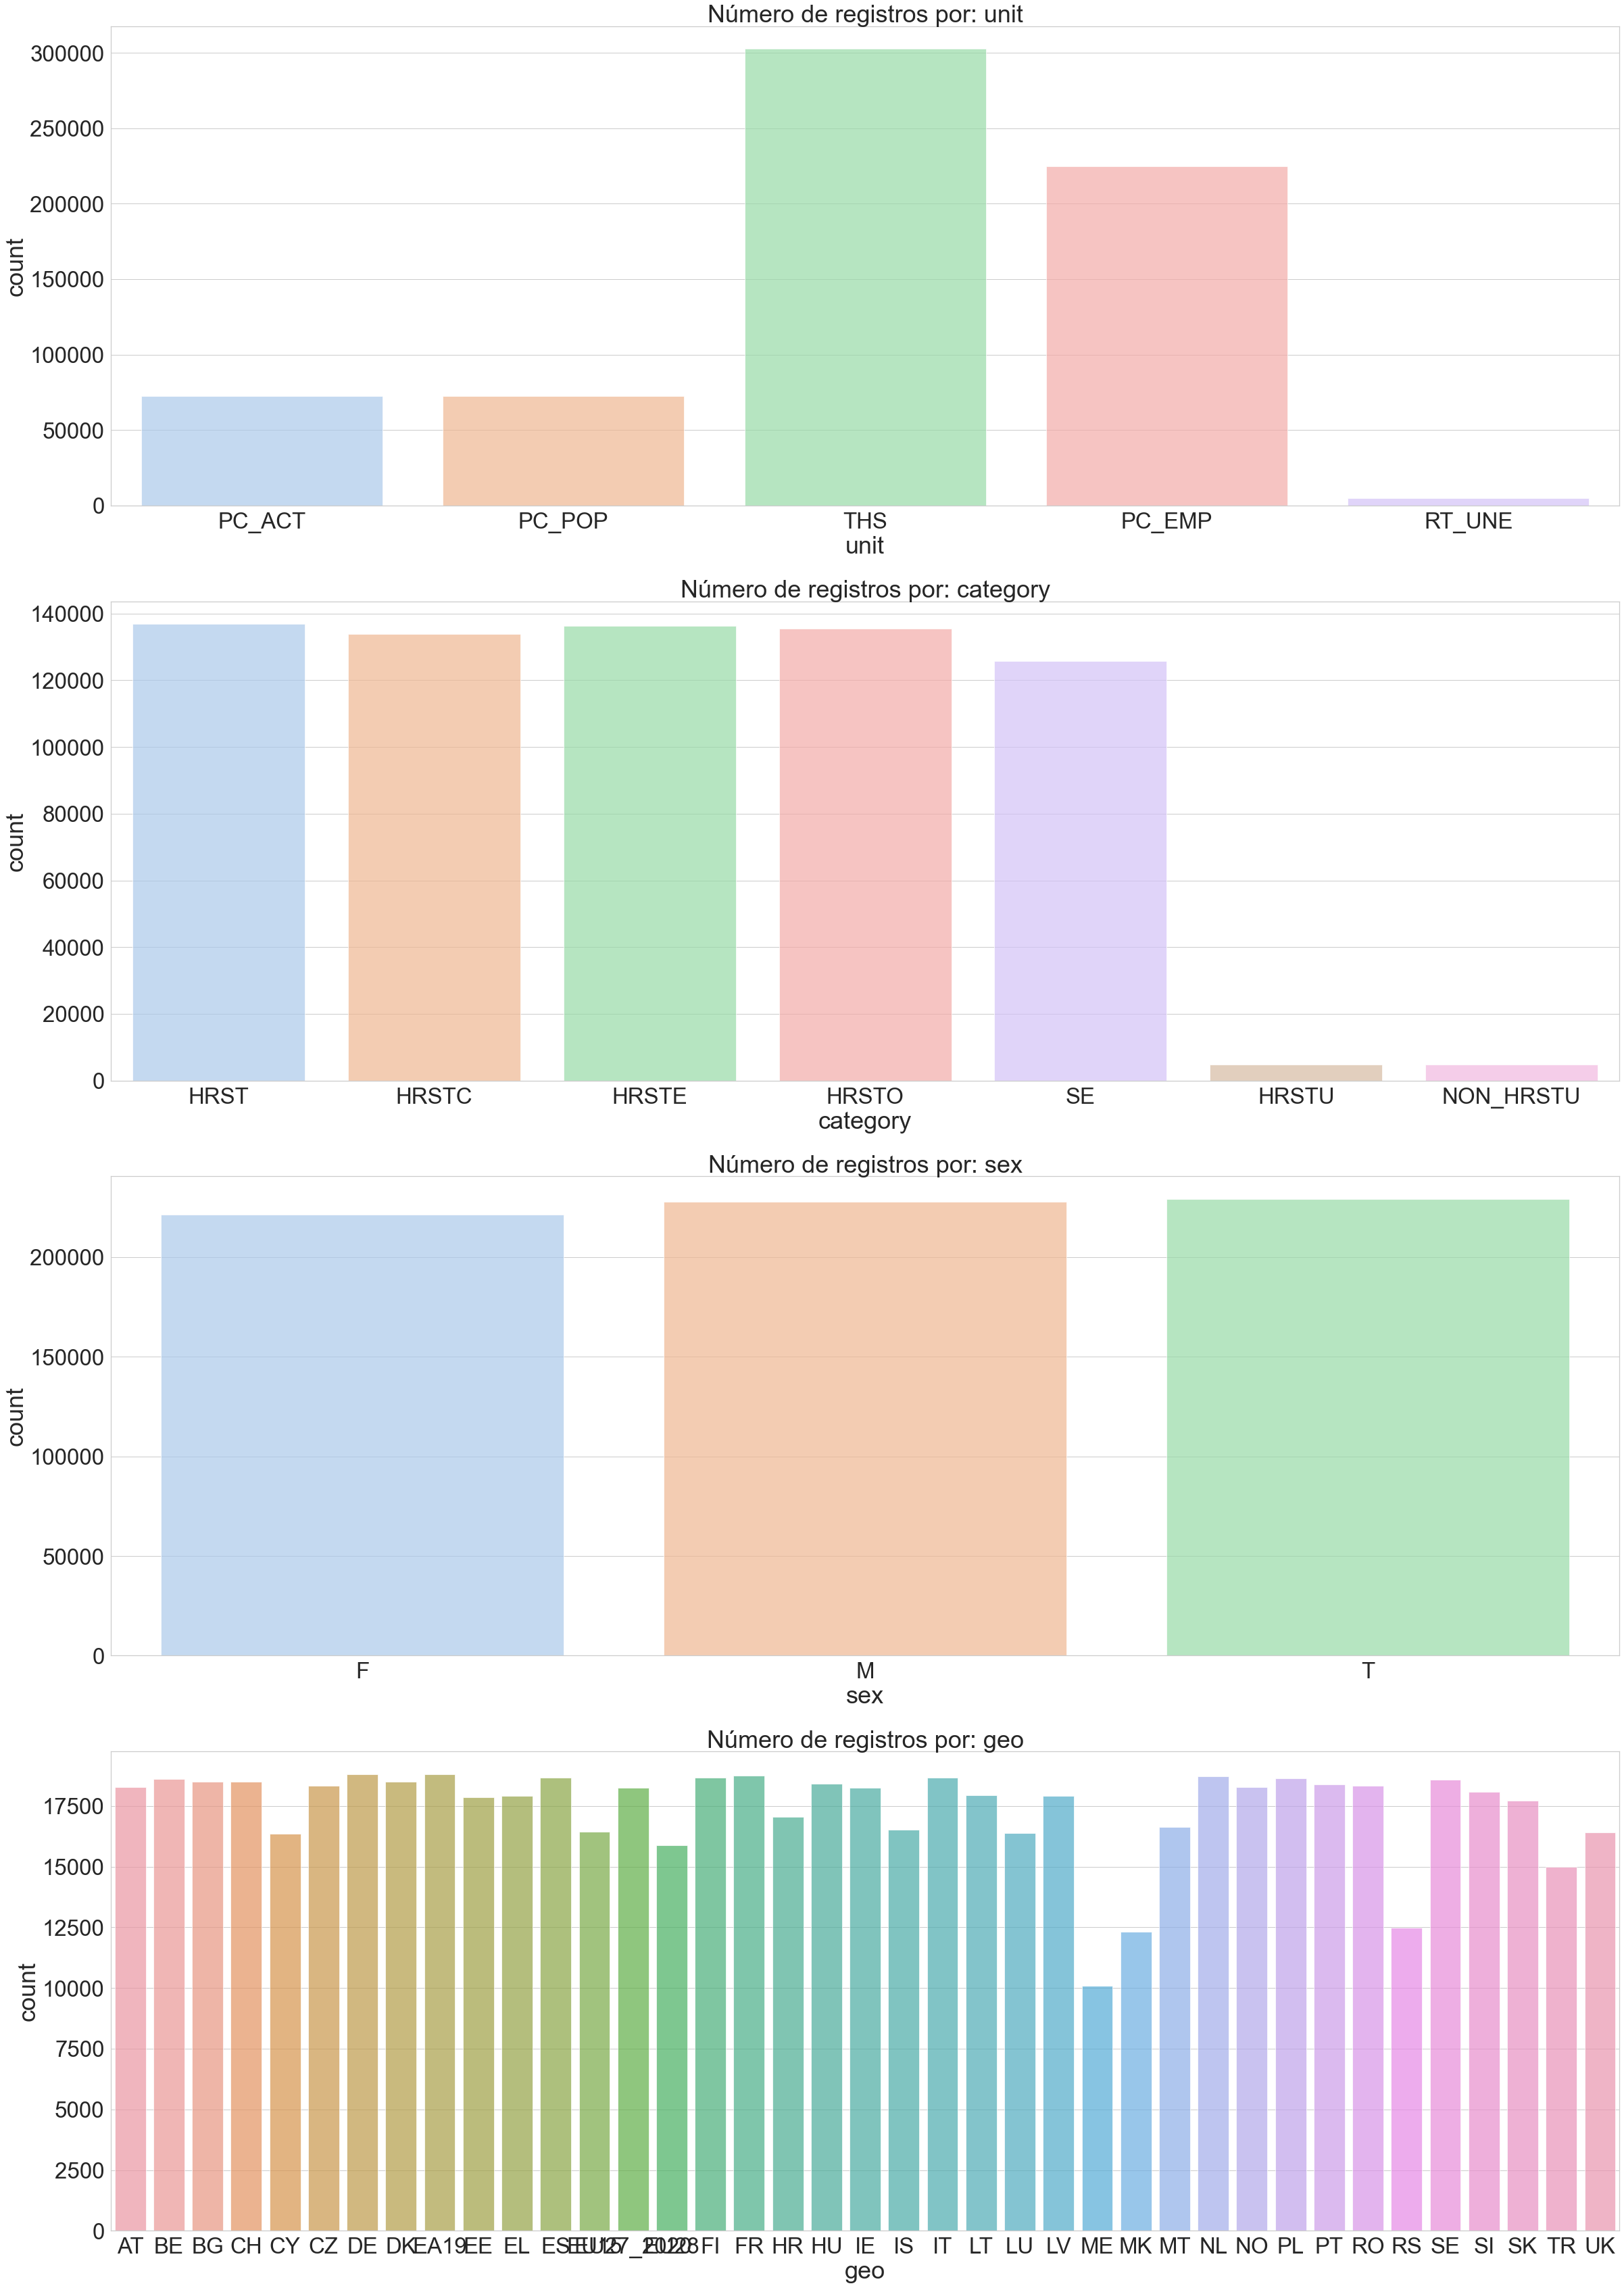

In [255]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots(nrows=len(variables_categoricas), ncols=1 , figsize=(40,60))
for i, variables_categorica in enumerate(variables_categoricas , start =0):
    data = Hrst_final[variables_categorica]
    sns.countplot(x=data, ax=ax[i],alpha=0.7).set(title='Número de registros por: {}'.format(variables_categorica))

In [256]:
print('El ámbito temporal del dataset abarcará los siguientes años: ', set(Hrst_final.TIME_PERIOD))

El ámbito temporal del dataset abarcará los siguientes años:  {2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021}


Guardamos el dataset resultante:

In [257]:
Hrst_final.to_csv('HRST.csv')

#### Las variables resultantes de este conjunto de datos son:


    Overall data coverage:	2000 — 2021
    Número de valores:	677 877

**unit**:

        Thousand [THS] 
        Unemployment rate [RT_UNE] 
        
**category**:

        Persons with tertiary education (ISCED) and/or employed in science and technology [HRST]
        Persons with tertiary education (ISCED) [HRSTE]
        Persons employed in science and technology [HRSTO]
        Persons with tertiary education (ISCED) and employed in science and technology [HRSTC]
        Scientists and engineers [SE]
        Unemployed persons with tertiary education (ISCED) [HRSTU]
        Unemployed persons with non-tertiary education (ISCED) [NON_HRSTU]

**sex**:

    F: Female
    M: Male
    T: Total

**geo**:

    European Union - 27 countries (from 2020) [EU27_2020]
    European Union - 28 countries (2013-2020) [EU28]
    European Union - 15 countries (1995-2004) [EU15]
    Euro area - 19 countries (from 2015) [EA19]
    Belgium [BE]
    Bulgaria [BG]
    Czechia [CZ]
    Denmark [DK]
    Germany (until 1990 former territory of the FRG) [DE]
    Estonia [EE]
    Romania [RO]
    Slovenia [SI]
    Slovakia [SK]
    Finland [FI]
    Sweden [SE]
    Iceland [IS]
    Norway [NO]
    Switzerland [CH]
    United Kingdom [UK]
    Montenegro [ME]
    North Macedonia [MK]
    Serbia [RS]

**TIME_PERIOD**:

    Desde 2000 a 2021 y para los datos de empleo desde el 2008
    
**OBS_VALUE**:

    Valor observado por unidad de medida
